# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
lifegdp = pd.read_csv("all_data.csv")
print(lifegdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
lifegdp.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)
print(lifegdp.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


In [5]:
lifegdp.shape

(96, 4)

In [6]:
print(lifegdp.Country.unique())
print(lifegdp.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


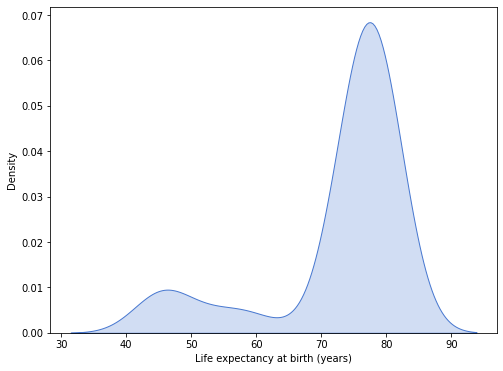

In [7]:
plt.figure(figsize=(8,6))
sns.set_palette("muted")
sns.kdeplot(lifegdp.LEABY, shade = True)
plt.xlabel("Life expectancy at birth (years)")
plt.show()
#the data is left skewed 

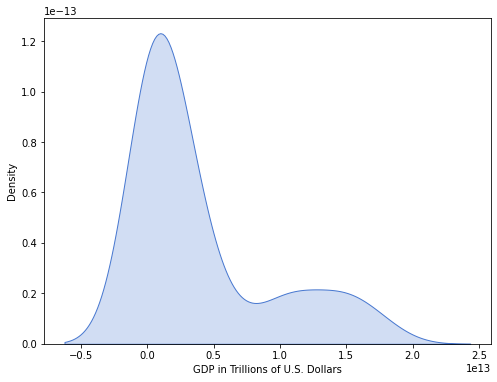

In [8]:
plt.figure(figsize=(8,6))
sns.kdeplot(lifegdp.GDP, shade = True)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
#the data is right skewed

In [9]:
lifegdp_means = lifegdp.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(lifegdp_means.head(6))

                    Country     LEABY           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


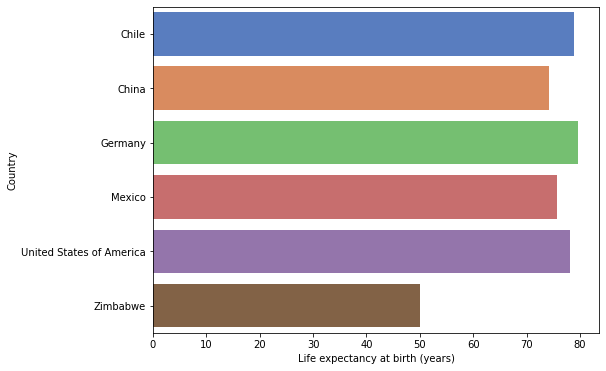

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=lifegdp_means)
plt.xlabel("Life expectancy at birth (years)")
plt.show()

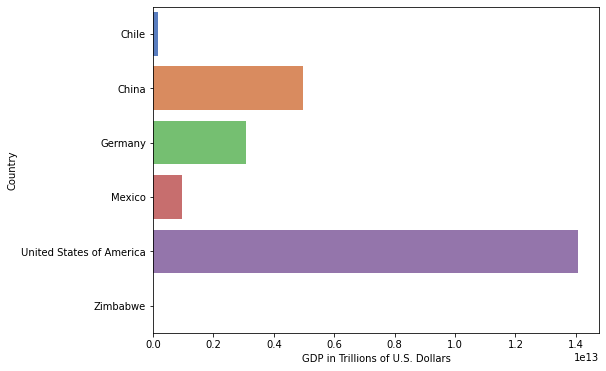

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=lifegdp_means)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

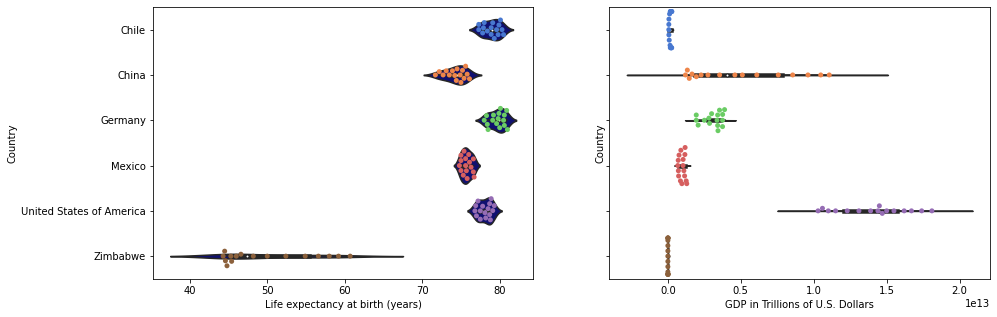

In [12]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax= axes[0], data = lifegdp, x = "LEABY", y="Country", color="navy")
axes[0] = sns.swarmplot(ax = axes[0], data = lifegdp, x = "LEABY", y="Country",  s=5)
axes[0].set_xlabel("Life expectancy at birth (years)")
axes[1] = sns.violinplot(ax= axes[1], data = lifegdp, x = "GDP", y="Country", color="navy")
axes[1] = sns.swarmplot(ax = axes[1], data = lifegdp, x = "GDP", y="Country",  s=5)
axes[1].set_xlabel("GDP in Trillions of U.S. Dollars")

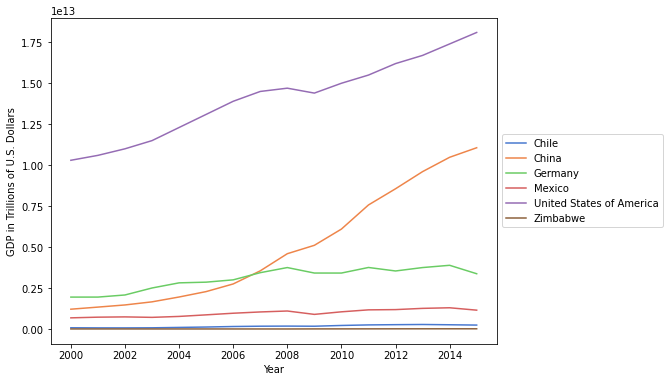

In [13]:
plt.figure(figsize=(8,6))
sns.lineplot(x=lifegdp.Year, y=lifegdp.GDP, hue=lifegdp.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

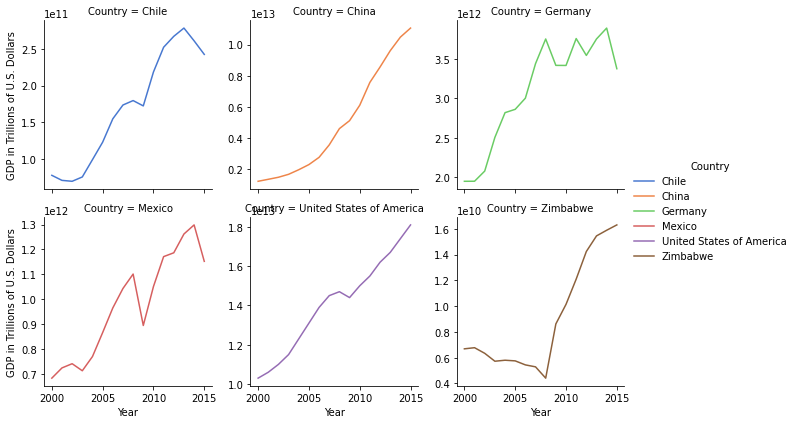

In [14]:
gdp_graph = sns.FacetGrid(lifegdp, col="Country", hue = "Country", col_wrap=3, sharey = False)
gdp_graph.map(sns.lineplot,"Year", "GDP")
gdp_graph.add_legend()
gdp_graph.set_axis_labels("Year","GDP in Trillions of U.S. Dollars")
plt.show()

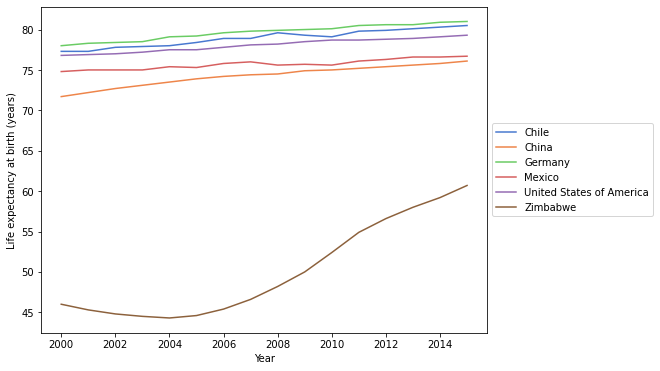

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(x=lifegdp.Year, y=lifegdp.LEABY, hue=lifegdp.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");
plt.show()

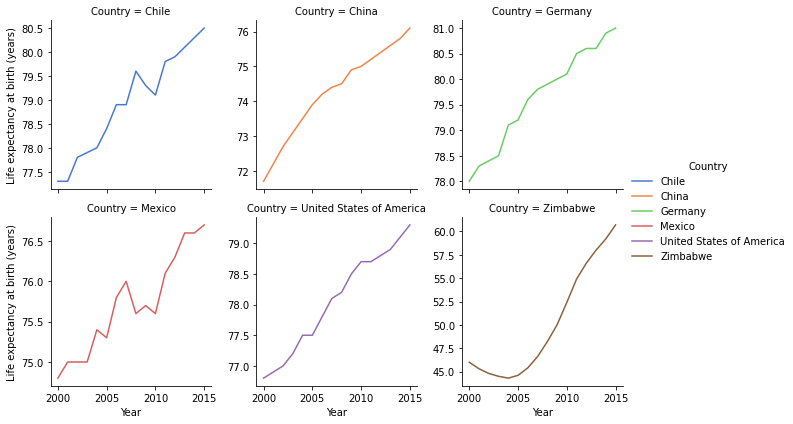

In [16]:
gdp_graph = sns.FacetGrid(lifegdp, col="Country", hue = "Country", col_wrap=3, sharey = False)
gdp_graph.map(sns.lineplot,"Year", "LEABY")
gdp_graph.add_legend()
gdp_graph.set_axis_labels("Year", "Life expectancy at birth (years)")
plt.show()

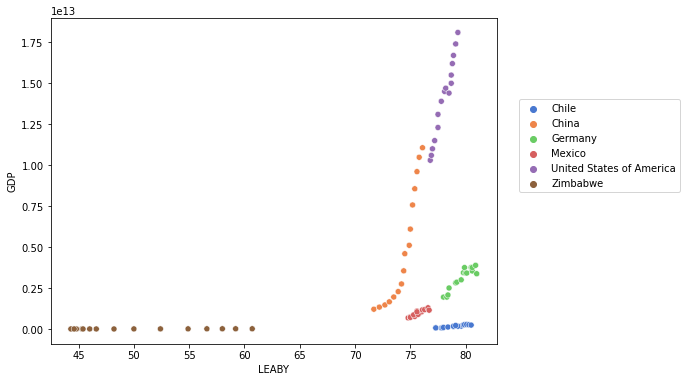

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=lifegdp.LEABY, y = lifegdp.GDP, hue = lifegdp.Country)
plt.legend(bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0.)
plt.show()

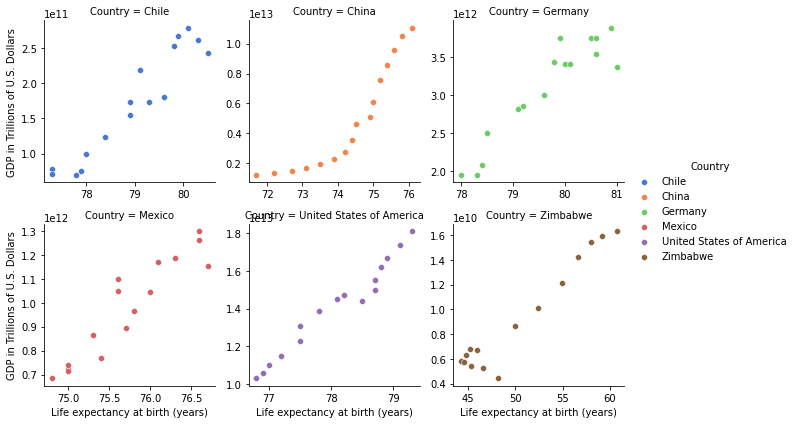

In [18]:
gdp_graph = sns.FacetGrid(lifegdp, col="Country", hue = "Country", col_wrap=3, sharey = False, sharex = False)
gdp_graph.map(sns.scatterplot,"LEABY", "GDP")
gdp_graph.add_legend()
gdp_graph.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars")
plt.show()

## Conclusions 
+ Has life expectancy increased over time in the six nations?
    + Yes, life expectancy has increased over time in the six nations. Zimbabwe experienced the largest amount of growth.
+ Has GDP increased over time in the six nations?
    + Yes, GDP has also increased over time. China has seen the most growth.
+ Is there a correlation between GDP and life expectancy of a country?
    + There appears to be a positive correlation between GDP and life expentancy for the countries in oru dataset.
#What is the average life expectancy in these nations?
    #The average life expextancy in these nations is around the mid-high 70s (Germany has the highest with an average LEABY of 79.7),
    #, with the expeception of Zimbabwe which was 50.1.
#What is the distribution of that life expectancy?
    #The life expectancy data was left-skewed. 